In [32]:
#import libraries
import numpy as np
import pprint
import scipy
import scipy.linalg
import pandas as pd
import random
from collections import OrderedDict
from scipy.linalg import svd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json
from tqdm import tqdm
from collections import defaultdict
from surprise import Reader, Dataset, accuracy
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline
from surprise.model_selection import train_test_split
np.set_printoptions(threshold=20)
pd.options.mode.copy_on_write = True

from ipynb.fs.full.SVD_FUNCTIONS import csv_to_df
from ipynb.fs.full.SVD_FUNCTIONS import Convert_to_Matrix
from ipynb.fs.full.SVD_FUNCTIONS import LU_Factorization
from ipynb.fs.full.SVD_FUNCTIONS import find_similar
from ipynb.fs.full.SVD_FUNCTIONS import get_most_frequent_users
from ipynb.fs.full.SVD_FUNCTIONS import get_users_with_minimal_ratings
from ipynb.fs.full.SVD_FUNCTIONS import get_training_data
from ipynb.fs.full.SVD_FUNCTIONS import pivot_rating_to_user_frame
from ipynb.fs.full.SVD_FUNCTIONS import do_svd
from ipynb.fs.full.SVD_FUNCTIONS import plot_data

from ipynb.fs.full.SVD_FUNCTIONS import recommend
from ipynb.fs.full.SVD_FUNCTIONS import get_tier_list
from ipynb.fs.full.SVD_FUNCTIONS import get_individual_user_data
from ipynb.fs.full.SVD_FUNCTIONS import print_user_data


In [6]:
books_ratings_cleaned, book_dict = csv_to_df("Books_rating.csv", "books_data.csv")

In [7]:
books_ratings_cleaned.count()

Id              2438213
User_id         2438213
review/score    2438213
dtype: int64

In [8]:
columns_titles = ["User_id","Id", "review/score"]

user_book_data = books_ratings_cleaned.head(500000)

user_book_data_reindex = user_book_data.reindex(columns=columns_titles)

user_book_data_reindex.head()

,User_id,Id,review/score
0,AVCGYZL8FQQTD,1882931173,4.0
1,A30TK6U7DNS82R,0826414346,5.0
2,A3UH4UZ4RSVO82,0826414346,5.0
3,A2MVUWT453QH61,0826414346,4.0
4,A22X4XUPKF66MR,0826414346,4.0


In [9]:
len(user_book_data_reindex['User_id'].unique())

314045

In [10]:
#EXCUTE ME PLEASE FOR REAL IM DYING
#LIKE REALLY, RUN ME
training_data, test_data = get_training_data(0.75, user_book_data)

100%|█████████████████████████████████████████████████████████████████████████| 11760/11760 [00:00<00:00, 12228.28it/s]


In [11]:
A = training_data.fillna(0)

A.shape

(1044, 11173)

In [33]:
column_names = list(A.columns)
row_names = list(A.transpose().columns)

user = 162

In [34]:
new_A= A.to_numpy()
# change the dtype to 'float64' 
new_A= new_A.astype('int64') 
# print the data type 
print(new_A.dtype)
U, Vt = do_svd(new_A,50)


int64


In [35]:
user_tiers = get_tier_list(column_names, row_names, user, Vt, book_dict)
user_individual_data, refined_user_list, get_user_scores, get_user_review_list = get_individual_user_data(column_names, row_names, A, user, book_dict)

User A633NIAR4JJAR recommendations:
1556909330 ['Dune', 1522]
B000HJNEYS ['Memoirs of a Geisha (Signed)', 2693]
0582538319 ['Hard Times (Structural Readers)', 81]
B000FC2N76 ['Hard Times (Bantam Classics)', 81]
B000KL3P7E ['The Epic of Gilgamesh: An English Version With an Introduction', 92]


In [36]:
print_user_data(user, refined_user_list, get_user_review_list, get_user_scores, row_names)

User A633NIAR4JJAR book reviews with score:

B000TZ19TC ['Fahrenheit 451', 1648] 5.0
B000KOII0U ['The Lion, The witch and the Wardrobe', 592] 5.0
B000IEZE3G ["Harry Potter and The Sorcerer's Stone", 6796] 5.0
B000GL8UMI ['Fahrenheit 451', 1639] 5.0
B000KAIZX4 ['Lion, the Witch, and the Wardrobe', 569] 5.0
B000TNGU5M ['Night', 961] 5.0
1579217370 ['Something That Lasts', 32] 5.0
0801022622 ['Biblical Preaching: The Development and Delivery of Expository Messages', 49] 5.0
B00005X479 ['Walden : or, Life in the woods', 303] 5.0
B00087U6XG ['The life and times of Jesus the Messiah', 36] 3.0
0849912229 ['The Macarthur Study Bible ~ New King James Version (NKJV)', 250] 5.0
0830815449 ['The Jesus Quest: The Third Search for the Jew of Nazareth', 21] 4.0
B0006SHMHA ['Population: 485 : Meeting Your Neighbors One Siren at a Time', 100] 5.0
B00086Q2YO ['The life and times of Jesus the Messiah', 36] 3.0
0764225545 ['Systematic Theology, Vol. 4: Church/Last Things', 6] 4.0
1591858828 ["23 Minutes I

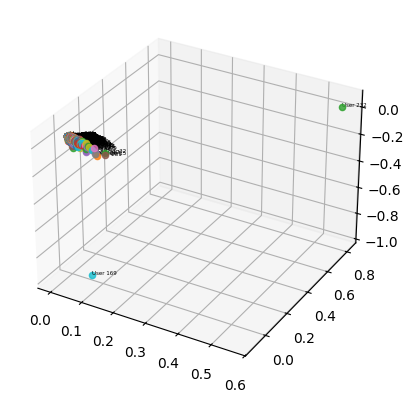

In [27]:
plot_data(U, "User")

In [67]:
#plot_data(Vt.transpose(), "User")

In [20]:
USERBOOK = user_book_data_reindex

reader = Reader()
data = Dataset.load_from_df(USERBOOK, reader)

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0530  1.0469  1.0513  1.0514  1.0541  1.0514  0.0024  
MAE (testset)     0.7844  0.7822  0.7850  0.7836  0.7859  0.7842  0.0013  
Fit time          7.42    7.59    8.29    7.71    7.71    7.74    0.29    
Test time         1.29    1.38    1.22    1.09    1.08    1.21    0.12    


{'test_rmse': array([1.05300092, 1.0469499 , 1.05131595, 1.05138255, 1.05413059]),
 'test_mae': array([0.78440503, 0.7821972 , 0.78497024, 0.78356565, 0.78590241]),
 'fit_time': (7.416504383087158,
  7.5873863697052,
  8.290653944015503,
  7.712865829467773,
  7.714359283447266),
 'test_time': (1.294778823852539,
  1.3831429481506348,
  1.2231407165527344,
  1.0850679874420166,
  1.0847342014312744)}

In [21]:
dataset = data.build_full_trainset()
svd = SVD(n_factors=10, reg_all=0.05)
svd.fit(dataset)

In [22]:
trainset, testset = train_test_split(data, test_size=0.10)
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.0456


1.0455565204207031

In [23]:
print(svd.predict(row_names[user], '0520050894'))
book_dict.get('0520050894')

user: A13G1TKIKHGV3F item: 0520050894 r_ui = None   est = 4.17   {'was_impossible': False}


["A Connecticut Yankee in King Arthur's Court (Mark Twain Library)", 239]